# Annotation Example

This example shows how to annotate a trajectory (and save the annotations) using the `annotated_trajectories` package, which supplements OpenPathSampling.

First you'll need to import the two packages (after installing them, of course).

In [1]:
import openpathsampling as paths
from annotated_trajectories import AnnotatedTrajectory, Annotation, plot_annotated

Now I'm going to create some fake data:

In [2]:
from openpathsampling.tests.test_helpers import make_1d_traj
traj = make_1d_traj([-1, 1, 4, 3, 6, 11, 22, 33, 23, 101, 205, 35, 45])

In [3]:
# to get a real trajectory:
# from openpathsampling.engines.openmm.tools import ops_load_trajectory
# traj = ops_load_trajectory("name_of_file.xtc", top="topology.pdb")  # can also be a .gro

Next I'll open the file. You'll only do this once, and then add all of your annotations for each trajectory into the open file.

In [4]:
storage = paths.Storage("output.nc", "w")

## Annotating trajectories

Now we get to the core. For each trajectory, you can choose state names, and you create a list of annotations for those states. Each annotation includes the state name, the first frame in the state, and the final frame in the state (first and final, named `begin` and `end`, are included in the state). Remember that, in Python, the first frame is 0.

Once you've made your annotations, you assign them to your trajectory by putting them both into an `AnnotatedTrajectory` object.

In [5]:
annotations = [
    Annotation(state="1-digit", begin=1, end=4),
    Annotation(state="2-digit", begin=6, end=8),
    Annotation(state="3-digit", begin=10, end=10),
    Annotation(state="2-digit", begin=11, end=12)
]
a_traj = AnnotatedTrajectory(trajectory=traj, annotations=annotations)

Note that I worry more about incorrectly identifying something as in the state when it actually is not, than missing any frame that could be in the state. There's always some room for optimization here, but you should err on the side of ensuring that your labels actually identify that state. Allow false negatives; don't allow false positives.

Next, you save the trajectory to the file using the `tag` attribute of the `storage`. This will save both the trajectory and all its annotations to the file.

In the future, we hope to avoid use of the `tag` store. However, for now I recommend using something like the file name of the trajectory as the string for the tag. It must be unique.

In [6]:
storage.tag['my_file_name'] = a_traj

Repeat the steps in the last two cells for each trajectory. When you're done, you can run:

In [7]:
storage.sync()
storage.close()

## Plotting annotations

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

In [9]:
def ln_x(snapshot):
    import math
    return math.log10(abs(snapshot.xyz[0][0]))

cv = paths.CoordinateFunctionCV("log(x)", ln_x)

In [10]:
state_1 = paths.CVDefinedVolume(cv, 0.0, 1.0)
state_2 = paths.CVDefinedVolume(cv, 1.0, 2.0)
state_3 = paths.CVDefinedVolume(cv, 2.0, 3.0)

In [11]:
names_to_states = {
    '1-digit': state_1,
    '2-digit': state_2,
    '3-digit': state_3,    
}
names_to_colors = {
    '1-digit': 'b',
    '2-digit': 'c',
    '3-digit': 'r'
}

(-0.1, 2.5)

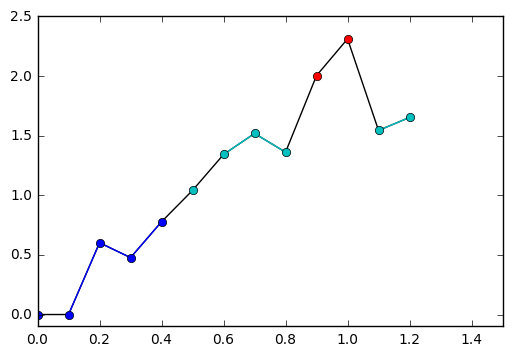

In [12]:
plot_annotated(a_traj, cv, names_to_states, names_to_colors, dt=0.1)
plt.xlim(xmax=1.5)
plt.ylim(ymin=-0.1)